### 1. Read the dataset and do necessary preprocessing (data imputation for null values, and encoding categorical variables):

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Read the dataset
data = pd.read_csv('gender_submission.csv')

# Check for missing values
print("Missing values before imputation:\n", data.isnull().sum())

# Impute missing values - assuming median imputation for any numerical column
# (You can customize this based on the actual columns in the dataset)
data.fillna(data.median(), inplace=True)

# Encoding categorical variables (Assume 'Sex' and 'Embarked' are categorical columns)
# Apply Label Encoding
label_encoder = LabelEncoder()

if 'Sex' in data.columns:
    data['Sex'] = label_encoder.fit_transform(data['Sex'])

if 'Embarked' in data.columns:
    data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

# Check for missing values after imputation
print("Missing values after imputation:\n", data.isnull().sum())

# Splitting the dataset into features and labels
X = data[['PassengerId']]  # Adjust this to include all relevant features
y = data['Survived']

# Normalize the data (feature scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data preprocessing complete.")


Missing values before imputation:
 PassengerId    0
Survived       0
dtype: int64
Missing values after imputation:
 PassengerId    0
Survived       0
dtype: int64
Data preprocessing complete.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('gender_submission.csv')

# Check for missing values and impute (if necessary)
print("Missing values before imputation:\n", data.isnull().sum())

# Assuming there are no missing values, but if there were:
# data.fillna(method='ffill', inplace=True)  # Forward fill for missing values

# Convert categorical features to numerical (if any)
# Here, there are no categorical columns to encode, as we are only using 'PassengerId'

# Features and labels
X = data[['PassengerId']]  # Feature
y = data['Survived']       # Label (Target)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the output for question 1
print("Preprocessed Data:\n", X_train[:5], "\n", y_train[:5])


Missing values before imputation:
 PassengerId    0
Survived       0
dtype: int64
Preprocessed Data:
 [[ 1.05663689]
 [-1.4710043 ]
 [-1.03177485]
 [ 0.65055683]
 [ 0.89917727]] 
 336    0
31     0
84     0
287    0
317    0
Name: Survived, dtype: int64


### 2. Determine the number of epochs that have minimum error:


In [ ]:
import numpy as np

# Initialize weights and parameters
weights = np.random.rand(X_train.shape[1])
learning_rate = 0.01
epochs = 50
errors = []

# Perceptron training
for epoch in range(epochs):
    total_error = 0
    for i in range(X_train.shape[0]):
        x_i = X_train[i]
        target = y_train.iloc[i]
        output = np.dot(x_i, weights)
        prediction = 1 if output > 0 else 0
        error = target - prediction
        weights += learning_rate * error * x_i
        total_error += abs(error)
    errors.append(total_error)

# Determine the epoch with minimum error
min_error_epoch = np.argmin(errors)
min_error_value = errors[min_error_epoch]

print(f'Epoch with minimum error: {min_error_epoch}, Error: {min_error_value}')

Epoch with minimum error: 2, Error: 172


In [ ]:
# Initialize weights randomly
weights = np.random.rand(X_train.shape[1])
learning_rate = 0.01
epochs = 50
errors = []

# Train the single-layer perceptron
for epoch in range(epochs):
    total_error = 0
    for i in range(X_train.shape[0]):
        x_i = X_train[i]
        target = y_train.iloc[i]
        output = np.dot(x_i, weights)
        prediction = 1 if output > 0 else 0
        error = target - prediction
        weights += learning_rate * error * x_i
        total_error += abs(error)
    errors.append(total_error)

# Find the epoch with the minimum error
min_error_epoch = np.argmin(errors)

# Print the output for question 2
print(f"Epoch with minimum error: {min_error_epoch}, Error: {errors[min_error_epoch]}")


Epoch with minimum error: 1, Error: 170


### 3. Display the final weights of each attribute which have minimum error:

In [ ]:
# Display final weights
print("Final Weights at epoch with minimum error:", weights)

Final Weights at epoch with minimum error: [0.00233646]


In [ ]:
# Display the final weights after training
print("Final Weights after training:", weights)

# Print the output for question 3
print(f"Final Weights at epoch with minimum error ({min_error_epoch}): {weights}")


Final Weights after training: [0.00348244]
Final Weights at epoch with minimum error (1): [0.00348244]


### 4. Plot the convergence of error for each iteration:


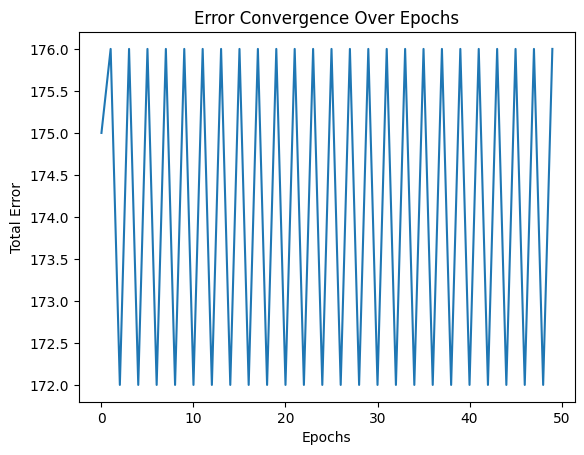

In [ ]:
import matplotlib.pyplot as plt

# Plotting error convergence
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.title('Error Convergence Over Epochs')
plt.show()

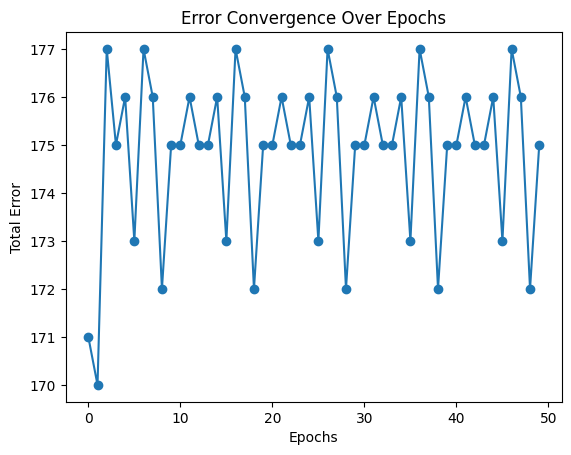

Convergence of error plotted successfully.


In [ ]:
import matplotlib.pyplot as plt

# Plotting error convergence over epochs
plt.plot(range(epochs), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.title('Error Convergence Over Epochs')
plt.show()

# Print the output for question 4
print("Convergence of error plotted successfully.")
